# Compare the impacts of high and low infilling

# Part 1: load data

In [1]:
import sys
stdout = sys.stdout

In [2]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import pyam
import seaborn as sns

<IPython.core.display.Javascript object>

In [3]:
version = "v6"

# Import the data

In [4]:
co2 = "Emissions|CO2"
ch4 = "Emissions|CH4"
co2eni = "Emissions|CO2|Energy and Industrial Processes"
kyoto = "Emissions|Kyoto Gases (AR6-GWP100)"

In [5]:
quantiles = [0.1, 0.5, 0.9]
em = {}
temps = {}
for q in quantiles:
    em[q] = pyam.IamDataFrame(f"../output/{version + '_quant' + str(q)}/infilled_emissions.csv")
    temps[q] = pd.read_csv(f"../output/{version + '_quant' + str(q)}/summaries/temperature_summary_{version + '_quant' + str(q)}.csv")

pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.core - INFO: Reading file ..\output\v6_quant0.1\infilled_emissions.csv
pyam.core - INFO: Reading file ..\output\v6_quant0.5\infilled_emissions.csv
pyam.core - INFO: Reading file ..\output\v6_quant0.9\infilled_emissions.csv


pyam.plotting - INFO: >=13 labels, not applying legend
pyam.plotting - INFO: >=13 labels, not applying legend
pyam.plotting - INFO: >=13 labels, not applying legend


<AxesSubplot:title={'center':'region: World - variable: Emissions|CH4'}, xlabel='Year', ylabel='Mt CH4/yr'>

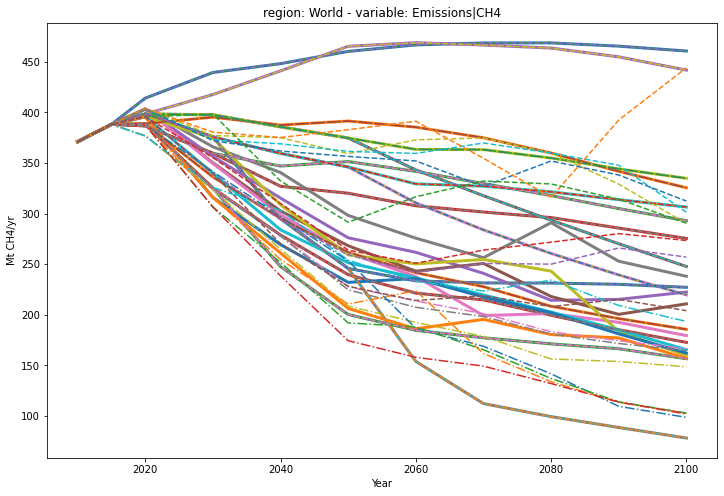

In [6]:
plt.figure(figsize=(12, 8))
ax = plt.subplot()
em[0.5].filter(variable=ch4, model="*").plot(ax=ax, linewidth=3)
em[0.1].filter(variable=ch4, model="*").plot(ax=ax, linestyle="-.")
em[0.9].filter(variable=ch4, model="*").plot(ax=ax, linestyle="--")


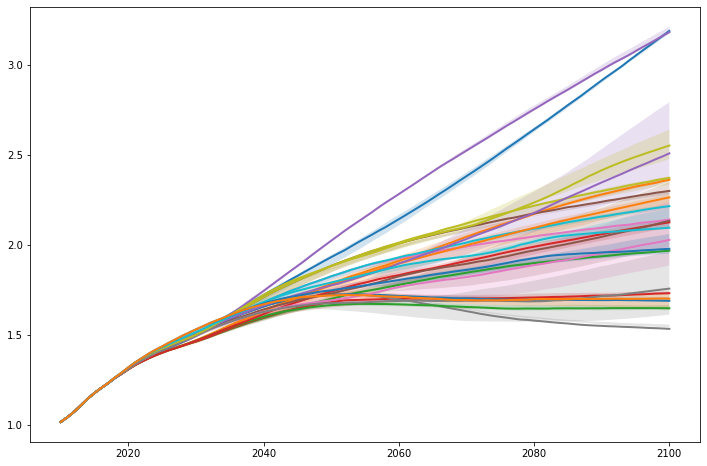

In [7]:
plt.figure(figsize=(12, 8))
years = np.arange(2010, 2101)
yearsstr = [str(x) for x in years]
ax = plt.subplot()
tmp = temps[0.5].loc[temps[0.5]["quantile"]==0.5, yearsstr]
plt.plot(years, tmp.T,linewidth=2)
qhigh = 0.9
tmphigh = temps[qhigh].loc[temps[qhigh]["quantile"]==0.5, yearsstr]
qlow = 0.1
tmplow = temps[qlow].loc[temps[qlow]["quantile"]==0.5, yearsstr]
for i in range(len(tmphigh)):
    plt.fill_between(years, tmplow.iloc[i], tmphigh.iloc[i], alpha=0.2)


In [8]:
temps[0.1].scenario.unique()

array(['GCAM-PR_5-3_-_Baseline', 'GCAM-PR_5-3_-_CP_EI',
       'GCAM-PR_5-3_-_NDC_EI', 'GCAM-PR_5-3_-_NDC_LTS',
       'GEMINI-E3_7-0_-_Baseline', 'GEMINI-E3_7-0_-_CP_EI',
       'GEMINI-E3_7-0_-_NDC_EI', 'GEMINI-E3_7-0_-_NDC_LTS',
       'GEMINI-E3_mixed_-_CP_EI', 'GEMINI-E3_mixed_-_NDC_EI',
       'GEMINI-E3_mixed_-_NDC_LTS', 'GEMINI_E3_from_Kyoto_-_CP_EI',
       'GEMINI_E3_from_Kyoto_-_LTS', 'GEMINI_E3_from_Kyoto_-_NDC_EI',
       'MUSE_-_baseline', 'MUSE_-_CP_EI', 'MUSE_-_NDC_EI',
       'MUSE_-_NDC_LTS', 'TIAM_Grantham_-_Baseline',
       'TIAM_Grantham_-_CP_EI', 'TIAM_Grantham_-_NDC_EI',
       'TIAM_Grantham_-_NDC_LTS'], dtype=object)

In [43]:
temps[0.5].loc[(temps[0.5]["quantile"]==0.5) & (temps[0.5].scenario.str.startswith(model)) & additional, :]

,Unnamed: 0,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,2093,2094,2095,2096,2097,2098,2099,2100,quantile,scenario
49,0.5,1.0145,1.0411,1.0717,1.1075,1.1439,1.1757,1.2036,1.2297,1.2586,...,3.0342,3.0541,3.0762,3.0974,3.1182,3.1388,3.1611,3.1812,0.5,GEMINI-E3_7-0_-_Baseline
93,0.5,1.0145,1.0411,1.0717,1.1075,1.1439,1.1757,1.2036,1.2297,1.2586,...,2.3216,2.3300,2.3367,2.3437,2.3500,2.3585,2.3653,2.3715,0.5,GEMINI-E3_mixed_-_CP_EI
104,0.5,1.0145,1.0411,1.0717,1.1075,1.1439,1.1757,1.2036,1.2297,1.2586,...,2.1745,2.1801,2.1857,2.1926,2.1987,2.2039,2.2095,2.2145,0.5,GEMINI-E3_mixed_-_NDC_EI
115,0.5,1.0145,1.0411,1.0717,1.1075,1.1439,1.1757,1.2036,1.2297,1.2586,...,1.6924,1.6916,1.6917,1.6907,1.6900,1.6897,1.6889,1.6883,0.5,GEMINI-E3_mixed_-_NDC_LTS


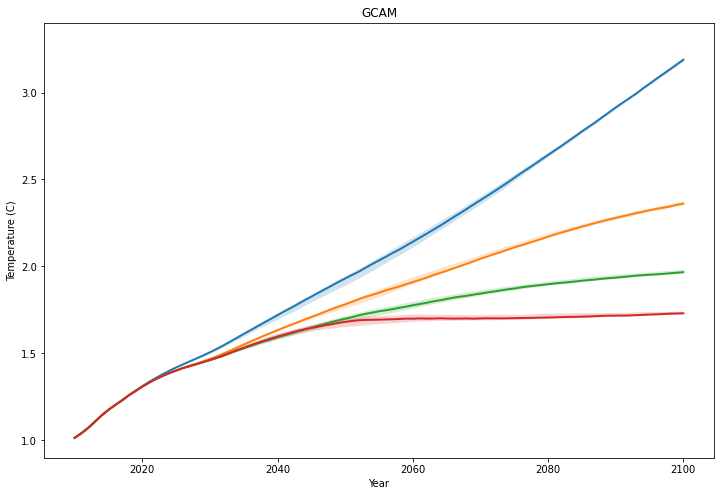

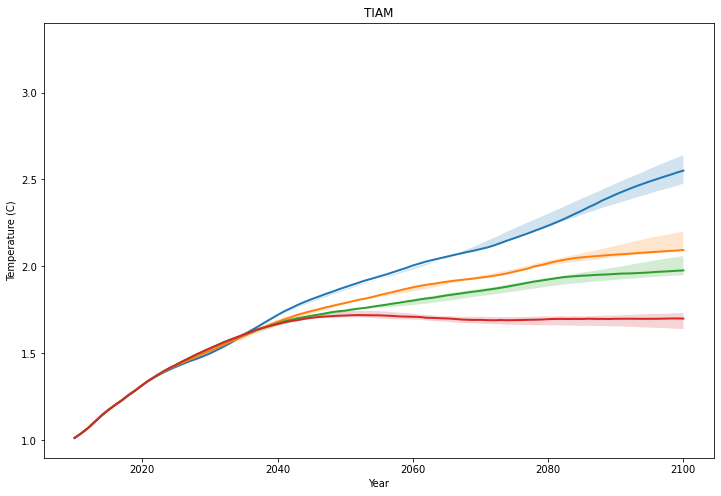

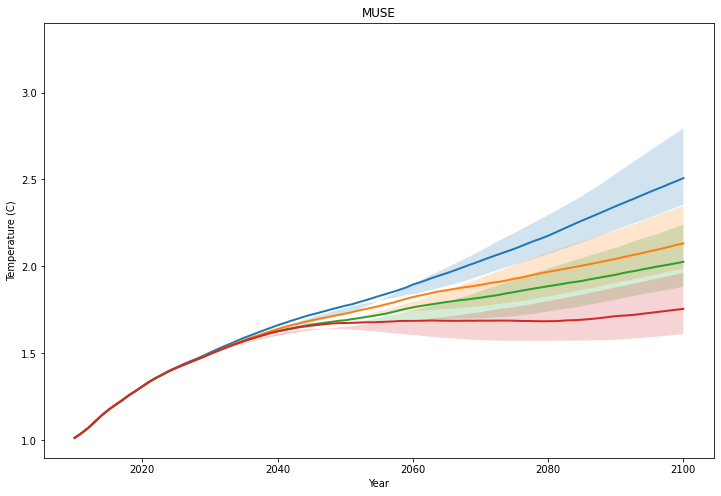

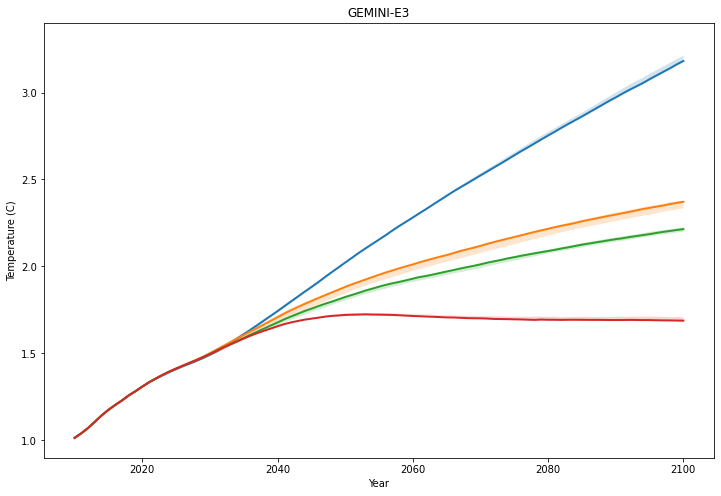

In [44]:
for model in ["GCAM", "TIAM", "MUSE", "GEMINI-E3"]:
    plt.figure(figsize=(12, 8))
    ax = plt.subplot()
    if model == "GEMINI-E3":
        additional = (temps[0.5].scenario.str.endswith("Baseline")) | (temps[0.5].scenario.str.startswith("GEMINI-E3_mixed"))
    else:
        additional = True
    tmp = temps[0.5].loc[(temps[0.5]["quantile"]==0.5) & (temps[0.5].scenario.str.startswith(model)) & additional, yearsstr]
    plt.plot(years, tmp.T,linewidth=2)
    qhigh = 0.9
    tmphigh = temps[qhigh].loc[(temps[qhigh]["quantile"]==0.5) & (temps[qhigh].scenario.str.startswith(model)) & additional, yearsstr]
    qlow = 0.1
    tmplow = temps[qlow].loc[(temps[qlow]["quantile"]==0.5) & (temps[qlow].scenario.str.startswith(model)) & additional, yearsstr]
    for i in range(len(tmphigh)):
        plt.fill_between(years, tmplow.iloc[i], tmphigh.iloc[i], alpha=0.2)
    plt.title(model)
    plt.xlabel("Year")
    plt.ylabel("Temperature (C)")
    plt.ylim([0.9, 3.4])
    #plt.savefig(f"../output/{version}_quant0.5/summaries/InfillingUncertaintyGraph{model}.png")


C:\Users\rlamboll\Anaconda3\envs\silicone-1\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000026693586D48> has a label of '_' which cannot be automatically added to the legend.
  
C:\Users\rlamboll\Anaconda3\envs\silicone-1\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000002669B84DE88> has a label of '_' which cannot be automatically added to the legend.
  
C:\Users\rlamboll\Anaconda3\envs\silicone-1\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000002669B79E5C8> has a label of '_' which cannot be automatically added to the legend.
  
C:\Users\rlamboll\Anaconda3\envs\silicone-1\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000002669B62E988> has a label of '_' which cannot be automatically added to the legend.
  


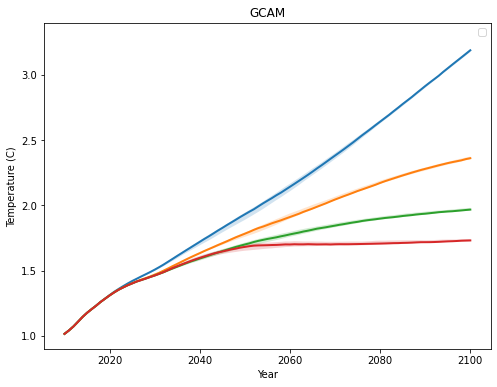

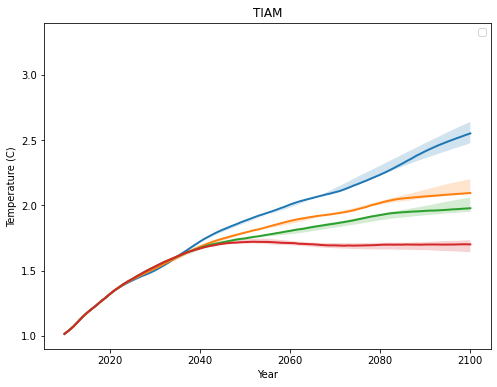

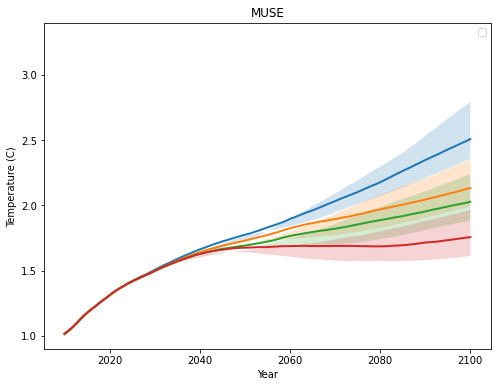

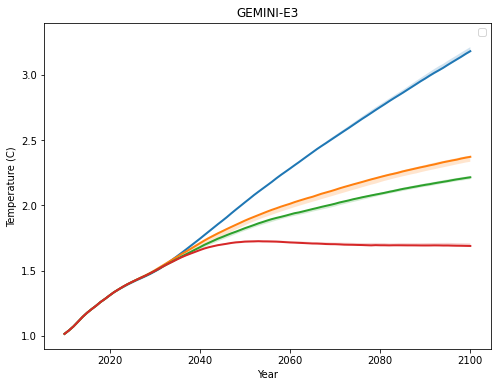

In [45]:
for model in ["GCAM", "TIAM", "MUSE", "GEMINI-E3"]:
    plt.figure(figsize=(8, 6))
    ax = plt.subplot()
    if model == "GEMINI-E3":
        additional = (temps[0.5].scenario.str.endswith("Baseline")) | (temps[0.5].scenario.str.startswith("GEMINI-E3_mixed"))
    else:
        additional = True
    tmp = temps[0.5].loc[(temps[0.5]["quantile"]==0.5) & (temps[0.5].scenario.str.startswith(model)) & additional, yearsstr]
    legstring =  [(x[-2] + " " if x[-2] != "-" else "") + x[-1] for x in temps[0.5].loc[
        (temps[0.5]["quantile"]==0.5) & (temps[0.5].scenario.str.startswith(model)) & additional, 
        "scenario"
    ].str.split("_")]
    plt.plot(years, tmp.T,linewidth=2)
    plt.legend("_")
    qhigh = 0.9
    tmphigh = temps[qhigh].loc[(temps[qhigh]["quantile"]==0.5) & (temps[qhigh].scenario.str.startswith(model)
                                                                 ) & additional, yearsstr]
    qlow = 0.1
    tmplow = temps[qlow].loc[(temps[qlow]["quantile"]==0.5) & (temps[qlow].scenario.str.startswith(model)
                                                              ) & additional, yearsstr]
    for i in range(len(tmphigh)):
        plt.fill_between(years, tmplow.iloc[i], tmphigh.iloc[i], alpha=0.2)
    plt.title(model)
    plt.xlabel("Year")
    plt.ylabel("Temperature (C)")
    plt.ylim([0.9, 3.4])
    plt.savefig(f"../output/{version}_quant0.5/summaries/InfillingUncertaintyGraph{model}.png")


In [11]:
temps[0.5].scenario.str.startswith("TIAM")

0      False
1      False
2      False
3      False
4      False
       ...  
237     True
238     True
239     True
240     True
241     True
Name: scenario, Length: 242, dtype: bool

In [12]:
out_folder = "../output/processed_files/"

In [13]:
ar6 = pyam.IamDataFrame("../input/AR6_Scenarios_Database_World_v1.0_emissions.csv")

pyam.core - INFO: Reading file ..\input\AR6_Scenarios_Database_World_v1.0_emissions.csv


In [14]:
em[0.5].filter(variable=co2eni).timeseries()

2010  \
model                scenario            region variable                                      unit                      
GCAM-PR 5.3          Baseline|Harmonized World  Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  32890.397797   
                     CP_EI|Harmonized    World  Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  32890.397797   
                     NDC_EI|Harmonized   World  Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  32890.397797   
                     NDC_LTS|Harmonized  World  Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  32890.397797   
GEMINI-E3 7.0        Baseline|Harmonized World  Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  32890.397797   
                     CP_EI|Harmonized    World  Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  32890.397797   
                     NDC_EI|Harmonized   World  Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  32890.397797   
                     NDC_LTS|Harmonized  World  Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  32890.397797   
GEMINI-E3 mixed      CP_EI|Harmonized    World  Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  32890.397797   
                     NDC_EI|Harmonized   World  Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  32890.397797   
                     NDC_LTS|Harmonized  World  Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  32890.397797   
GEMINI_E3 from Kyoto CP_EI|Harmonized    World  Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  32890.397797   
                     LTS|Harmonized      World  Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  32890.397797   
                     NDC_EI|Harmonized   World  Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  32890.397797   
MUSE                 CP_EI|Harmonized    World  Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  32890.397797   
                     NDC_EI|Harmonized   World  Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  32890.397797   
                     NDC_LTS|Harmonized  World  Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  32890.397797   
                     baseline|Harmonized World  Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  32890.397797   
TIAM_Grantham        Baseline|Harmonized World  Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  32890.397797   
                     CP_EI|Harmonized    World  Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  32890.397797   
                     NDC_EI|Harmonized   World  Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  32890.397797   
                     NDC_LTS|Harmonized  World  Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  32890.397797   

                                                                                                                 2015  \
model                scenario            region variable                                      unit                      
GCAM-PR 5.3          Baseline|Harmonized World  Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  35635.286298   
                     CP_EI|Harmonized    World  Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  35635.286298   
                     NDC_EI|Harmonized   World  Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  35635.286298   
                     NDC_LTS|Harmonized  World  Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  35635.286298   
GEMINI-E3 7.0        Baseline|Harmonized World  Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  35635.286298   
                     CP_EI|Harmonized    World  Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  35635.286298   
                     NDC_EI|Harmonized   World  Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  35635.286298   
                     NDC_LTS|Harmonized  World  Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  35635.286298  

In [15]:
ar6.filter(variable=co2eni, region="World", year=em[0.5].year)

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : AIM/CGE 2.0, AIM/CGE 2.1, AIM/CGE 2.2, ... WITCH-GLOBIOM 4.4 (76)
 * scenario : 1, 1.5C, 1.5C A, 1.5C B, 1.5C C, ... peak2025_DemandLow_FossilLow_TechHigh (798)
Timeseries data coordinates:
   region   : World (1)
   variable : Emissions|CO2|Energy and Industrial Processes (1)
   unit     : Mt CO2/yr (1)
   year     : 2010, 2015, 2020, 2030, 2040, 2050, 2060, 2070, ... 2100 (11)
Meta indicators:
   exclude (bool) False (1)

In [16]:
em[0.5].scenario

['Baseline|Harmonized',
 'CP_EI|Harmonized',
 'LTS|Harmonized',
 'NDC_EI|Harmonized',
 'NDC_LTS|Harmonized',
 'baseline|Harmonized']

In [17]:
toplot = em[0.5].filter(model=["*from Kyoto", "GEMINI-E3 7.0"], keep=False).rename(
    {"variable":{"Emissions|Kyoto Gases (AR5-GWP100)":"Emissions|Kyoto Gases (AR6-GWP100)"}}
)

In [18]:
toplot = toplot.rename({"model":{"GEMINI-E3 mixed": "GEMINI-E3", "GCAM-PR 5.3": "GCAM-PR"}})
toplot = toplot.rename({ "scenario": {I: I.replace("|Harmonized", "") for I in toplot.scenario}})

In [19]:
toplot.scenario

['Baseline', 'CP_EI', 'NDC_EI', 'NDC_LTS', 'baseline']

In [20]:
toplot.model

['GCAM-PR', 'GEMINI-E3', 'MUSE', 'TIAM_Grantham']

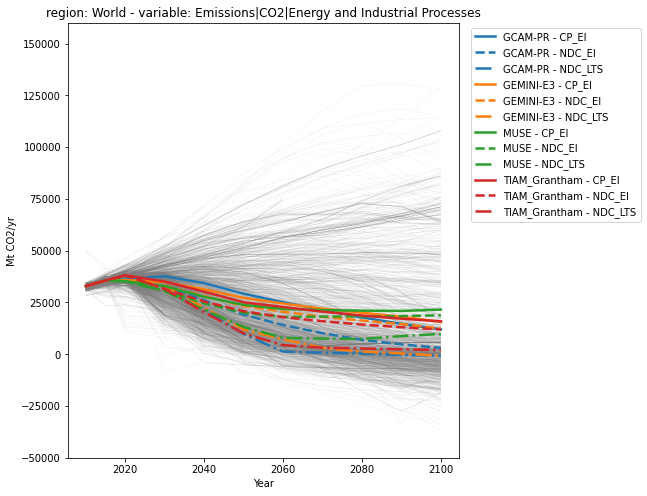

In [27]:
plt.figure(figsize=(7, 8))
ax = plt.subplot()
ar6.filter(variable=co2eni, region="World", year=em[0.5].year).plot(ax=ax, linewidth=0.05, color="grey", label="_nolegend")
a=toplot.filter(variable=co2eni, scenario=["CP_EI", "*NDC_EI*", "*LTS*"]).plot(
    ax=ax, linewidth=2.5, linestyle="scenario", color="model")
plt.ylim([-50000, 160000])
ax.legend(bbox_to_anchor=(1.02, 1))

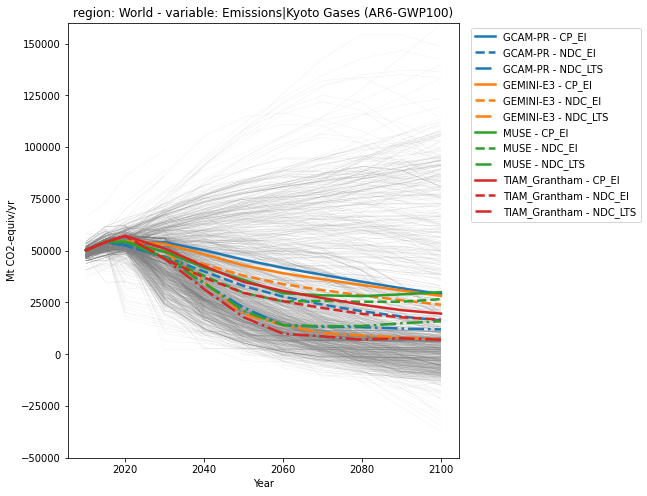

In [26]:
plt.figure(figsize=(7, 8))
ax = plt.subplot()
ar6.filter(variable="*Kyoto*", region="World", year=em[0.5].year).plot(ax=ax, linewidth=0.05, color="grey", label="_nolegend")
a=toplot.filter(variable=kyoto, scenario=["CP_EI", "*NDC_EI*", "*LTS*"]).plot(
    ax=ax, linewidth=2.5, linestyle="scenario", color="model")
plt.ylim([-50000, 160000])
ax.legend(bbox_to_anchor=(1.02, 1))

In [23]:
em[0.5].filter(variable="*Kyoto*", scenario="NDC_EI*").timeseries()

2010  \
model                scenario          region variable                           unit                            
GCAM-PR 5.3          NDC_EI|Harmonized World  Emissions|Kyoto Gases (AR6-GWP100) Mt CO2-equiv/yr  50209.503493   
GEMINI-E3 7.0        NDC_EI|Harmonized World  Emissions|Kyoto Gases (AR6-GWP100) Mt CO2-equiv/yr  50209.503493   
GEMINI-E3 mixed      NDC_EI|Harmonized World  Emissions|Kyoto Gases (AR6-GWP100) Mt CO2-equiv/yr  50209.503493   
                                              Emissions|Kyoto Gases (AR5-GWP100) Mt CO2-equiv/yr           NaN   
GEMINI_E3 from Kyoto NDC_EI|Harmonized World  Emissions|Kyoto Gases (AR6-GWP100) Mt CO2-equiv/yr  50209.503493   
                                              Emissions|Kyoto Gases (AR5-GWP100) Mt CO2-equiv/yr  50141.447145   
MUSE                 NDC_EI|Harmonized World  Emissions|Kyoto Gases (AR6-GWP100) Mt CO2-equiv/yr  50209.503493   
TIAM_Grantham        NDC_EI|Harmonized World  Emissions|Kyoto Gases (AR6-GWP100) Mt CO2-equiv/yr  50209.503493   

                                                                                                          2015  \
model                scenario          region variable                           unit                            
GCAM-PR 5.3          NDC_EI|Harmonized World  Emissions|Kyoto Gases (AR6-GWP100) Mt CO2-equiv/yr  54198.069883   
GEMINI-E3 7.0        NDC_EI|Harmonized World  Emissions|Kyoto Gases (AR6-GWP100) Mt CO2-equiv/yr  54198.069883   
GEMINI-E3 mixed      NDC_EI|Harmonized World  Emissions|Kyoto Gases (AR6-GWP100) Mt CO2-equiv/yr  54198.069883   
                                              Emissions|Kyoto Gases (AR5-GWP100) Mt CO2-equiv/yr           NaN   
GEMINI_E3 from Kyoto NDC_EI|Harmonized World  Emissions|Kyoto Gases (AR6-GWP100) Mt CO2-equiv/yr  54198.069883   
                                              Emissions|Kyoto Gases (AR5-GWP100) Mt CO2-equiv/yr  54125.849662   
MUSE                 NDC_EI|Harmonized World  Emissions|Kyoto Gases (AR6-GWP100) Mt CO2-equiv/yr  54198.069883   
TIAM_Grantham        NDC_EI|Harmonized World  Emissions|Kyoto Gases (AR6-GWP100) Mt CO2-equiv/yr  54198.069883   

                                                                                                          2020  \
model                scenario          region variable                           unit                            
GCAM-PR 5.3          NDC_EI|Harmonized World  Emissions|Kyoto Gases (AR6-GWP100) Mt CO2-equiv/yr  52528.620162   
GEMINI-E3 7.0        NDC_EI|Harmonized World  Emissions|Kyoto Gases (AR6-GWP100) Mt CO2-equiv/yr  54591.122193   
GEMINI-E3 mixed      NDC_EI|Harmonized World  Emissions|Kyoto Gases (AR6-GWP100) Mt CO2-equiv/yr  54591.122193   
                                              Emissions|Kyoto Gases (AR5-GWP100) Mt CO2-equiv/yr           NaN   
GEMINI_E3 from Kyoto NDC_EI|Harmonized World  Emissions|Kyoto Gases (AR6-GWP100) Mt CO2-equiv/yr  49783.173062   
                                              Emissions|Kyoto Gases (AR5-GWP100) Mt CO2-equiv/yr  49705.656903   
MUSE                 NDC_EI|Harmonized World  Emissions|Kyoto Gases (AR6-GWP100) Mt CO2-equiv/yr  54272.458609   
TIAM_Grantham        NDC_EI|Harmonized World  Emissions|Kyoto Gases (AR6-GWP100) Mt CO2-equiv/yr  57162.858656   

                                                                                                          2030  \
model                scenario          region variable                           unit                            
GCAM-PR 5.3          NDC_EI|Harmonized World  Emissions|Kyoto Gases (AR6-GWP100) Mt CO2-equiv/yr  47076.093663   
GEMINI-E3 7.0        NDC_EI|Harmonized World  Emissions|Kyoto Gases (AR6-GWP100) Mt CO2-equiv/yr  49612.046435   
GEMINI-E3 mixed      NDC_EI|Harmonized World  Emissions|Kyoto Gases (AR6-GWP100) Mt CO2-equiv/yr  49612.046435   
                                              Emissions|Kyoto Gases (AR5-GWP100) Mt CO2-equiv/yr           NaN   